In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import linregress
from scipy import stats

<div style="text-align: center;">
    
# FIRST PART
---

</div>

## LOAD CRIME DATA CSV AND CLEAN DATA
### IN THIS PART WE WILL LOAD THE CSV AND THEN CLEAN THE DATA IN ORDER TO HAVE 10 YEARS OF USEFUL DATA TO BE ABLE TO OBTAIN PLOTS AND GET USEFUL ANALYSIS WITH THE DATA


In [2]:
#Load crime data csv and getting a preview of the dataframe
file_crime =Path("Resources/crime_data.csv")
crime_data = pd.read_csv(file_crime, encoding="ISO-8859-1")

crime_data.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#dropping some unnecessary columns
crime_data = crime_data.drop(columns=['Clave_Ent', 'Subtipo de delito', 'Modalidad','Bien jurídico afectado'])
crime_data.head()

,Año,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,Homicidio,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,Aguascalientes,Homicidio,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,Aguascalientes,Homicidio,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,Homicidio,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Aguascalientes,Homicidio,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#obtaining the sum of crimes per month to an annual total in a new column
crime_data = pd.DataFrame(crime_data)
crime_data['Total Delitos por Mes'] = crime_data[['Enero', 'Febrero', 'Marzo', 'Abril', 
                                                    'Mayo', 'Junio', 'Julio', 'Agosto', 
                                                    'Septiembre', 'Octubre', 'Noviembre', 
                                                    'Diciembre']].sum(axis=1)
crime_data

,Año,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos por Mes
0,2015,Aguascalientes,Homicidio,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,18.0
1,2015,Aguascalientes,Homicidio,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
2,2015,Aguascalientes,Homicidio,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0,12.0
3,2015,Aguascalientes,Homicidio,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2015,Aguascalientes,Homicidio,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25083,2022,Zacatecas,Falsificación,5,14,7,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
25084,2022,Zacatecas,Contra el medio ambiente,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25085,2022,Zacatecas,Delitos cometidos por servidores públicos,12,26,45,84,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0
25086,2022,Zacatecas,Electorales,5,1,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [5]:
#cleaning the dataframe to replace some errors found and nan values then getting the total annual in a new column
crime_data.fillna(0, inplace=True)
month_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 
                 'Junio', 'Julio', 'Agosto', 'Septiembre', 
                 'Octubre', 'Noviembre', 'Diciembre']

for month in month_columns:
    crime_data[month] = pd.to_numeric(crime_data[month], errors='coerce')  

grouped_df_2 = crime_data.groupby(['Entidad', 'Tipo de delito', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Getting the annual total
grouped_df_2['Total Delitos'] = grouped_df_2.iloc[:, 3:].sum(axis=1)

print("\nGrouped Dataframe by State, Type of crime and Year:")
grouped_df_2


Grouped Dataframe by State, Type of crime and Year:


,Entidad,Tipo de delito,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,Aborto,2015,0,3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,Aguascalientes,Aborto,2016,1,0,0,2,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7.0
2,Aguascalientes,Aborto,2017,0,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
3,Aguascalientes,Aborto,2018,2,0,0,1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0
4,Aguascalientes,Aborto,2019,0,0,0,2,2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,Zacatecas,Violencia familiar,2018,128,149,177,196,187,188.0,186.0,195.0,195.0,220.0,162.0,168.0,2151.0
10236,Zacatecas,Violencia familiar,2019,153,186,244,215,269,252.0,248.0,257.0,231.0,245.0,260.0,234.0,2794.0
10237,Zacatecas,Violencia familiar,2020,246,237,288,245,262,363.0,291.0,323.0,266.0,266.0,285.0,244.0,3316.0
10238,Zacatecas,Violencia familiar,2021,249,302,348,331,353,318.0,274.0,289.0,246.0,273.0,243.0,227.0,3453.0


In [6]:
#Getting the Grouped Dataframe by Entity  and year with Total crimes overall
total_crimes_by_entity = grouped_df_2.groupby(['Entidad', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

total_crimes_by_entity['Total Delitos'] = total_crimes_by_entity.iloc[:, 2:].sum(axis=1)

print("\nGrouped Dataframe by Entity  and year with Total crimes overall:")
total_crimes_by_entity


Grouped Dataframe by Entity  and year with Total crimes overall:


,Entidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Zacatecas,2018,1624,1667,1780,1810,1835,1712.0,1780.0,1978.0,1750.0,1873.0,1621.0,1640.0,21070.0
252,Zacatecas,2019,1718,1757,1989,1895,2116,2102.0,2054.0,2006.0,2070.0,2246.0,2060.0,1939.0,23952.0
253,Zacatecas,2020,2151,2059,2071,1441,1558,2201.0,1933.0,1947.0,1919.0,1879.0,1808.0,1775.0,22742.0
254,Zacatecas,2021,1840,1990,2243,2186,2246,2225.0,1930.0,2093.0,2047.0,2170.0,2227.0,1913.0,25110.0


In [7]:
#Since we saw that we have incomplete data for the year 2022 we decided to drop that year in order to do a proper analysis
filtered_crime_data = total_crimes_by_entity[(total_crimes_by_entity['Año'] >= 2015) & (total_crimes_by_entity['Año'] <= 2021)]

print("\nFiltered Dataframe (2015 a 2021):")
filtered_crime_data


Filtered Dataframe (2015 a 2021):


,Entidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Zacatecas,2017,1433,1399,1600,1405,1722,1713.0,1558.0,1756.0,1607.0,1702.0,1553.0,1426.0,18874.0
251,Zacatecas,2018,1624,1667,1780,1810,1835,1712.0,1780.0,1978.0,1750.0,1873.0,1621.0,1640.0,21070.0
252,Zacatecas,2019,1718,1757,1989,1895,2116,2102.0,2054.0,2006.0,2070.0,2246.0,2060.0,1939.0,23952.0
253,Zacatecas,2020,2151,2059,2071,1441,1558,2201.0,1933.0,1947.0,1919.0,1879.0,1808.0,1775.0,22742.0


In [8]:
total_crimes_filter = filtered_crime_data.rename(columns={"Entidad":"State", "Año":"Year","Enero":"January", "Febrero":"February", "Marzo":"March", "Abril":"April","Mayo":"May","Junio":"June", "Julio":"July", "Agosto":"August", "Septiembre":"September", "Octubre":"October", "Noviembre":"November", "Diciembre":"December", "Total Delitos": "Total Crime"})

print("\nDataFrame Grouped by Entity and Year with Total Crimes")
total_crimes_filter.head(20)


DataFrame Grouped by Entity and Year with Total Crimes


,State,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total Crime
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
5,Aguascalientes,2020,3254,3183,3429,2085,2305,2951.0,2924.0,2730.0,2735.0,2917.0,2473.0,2640.0,33626.0
6,Aguascalientes,2021,2789,2730,3263,2979,3149,3041.0,2931.0,3039.0,3069.0,3039.0,2844.0,2772.0,35645.0
8,Baja California,2015,9261,8620,10065,9504,9945,10651.0,10695.0,10861.0,10465.0,10621.0,9731.0,9525.0,119944.0
9,Baja California,2016,9055,9288,9319,9374,9600,8673.0,8424.0,9270.0,8940.0,9544.0,8540.0,9082.0,109109.0
10,Baja California,2017,8963,8244,9963,9669,9830,9397.0,9791.0,9881.0,9502.0,9301.0,8747.0,8434.0,111722.0


<div style="text-align: center;">
    
# SECOND PART
---

</div>

## BAR AND LINE GRAPHS OF INCREASE IN CRIME FROM 2015 TO 2021
### IN THIS PART WE WILL PLOT THE CRIME INCREASE  THROUGH 2015 TO 2021 ON ALL THE STATES ON MEXICO AND THEN ON THE TOP 5 AND BOTTOM 5 STATES 

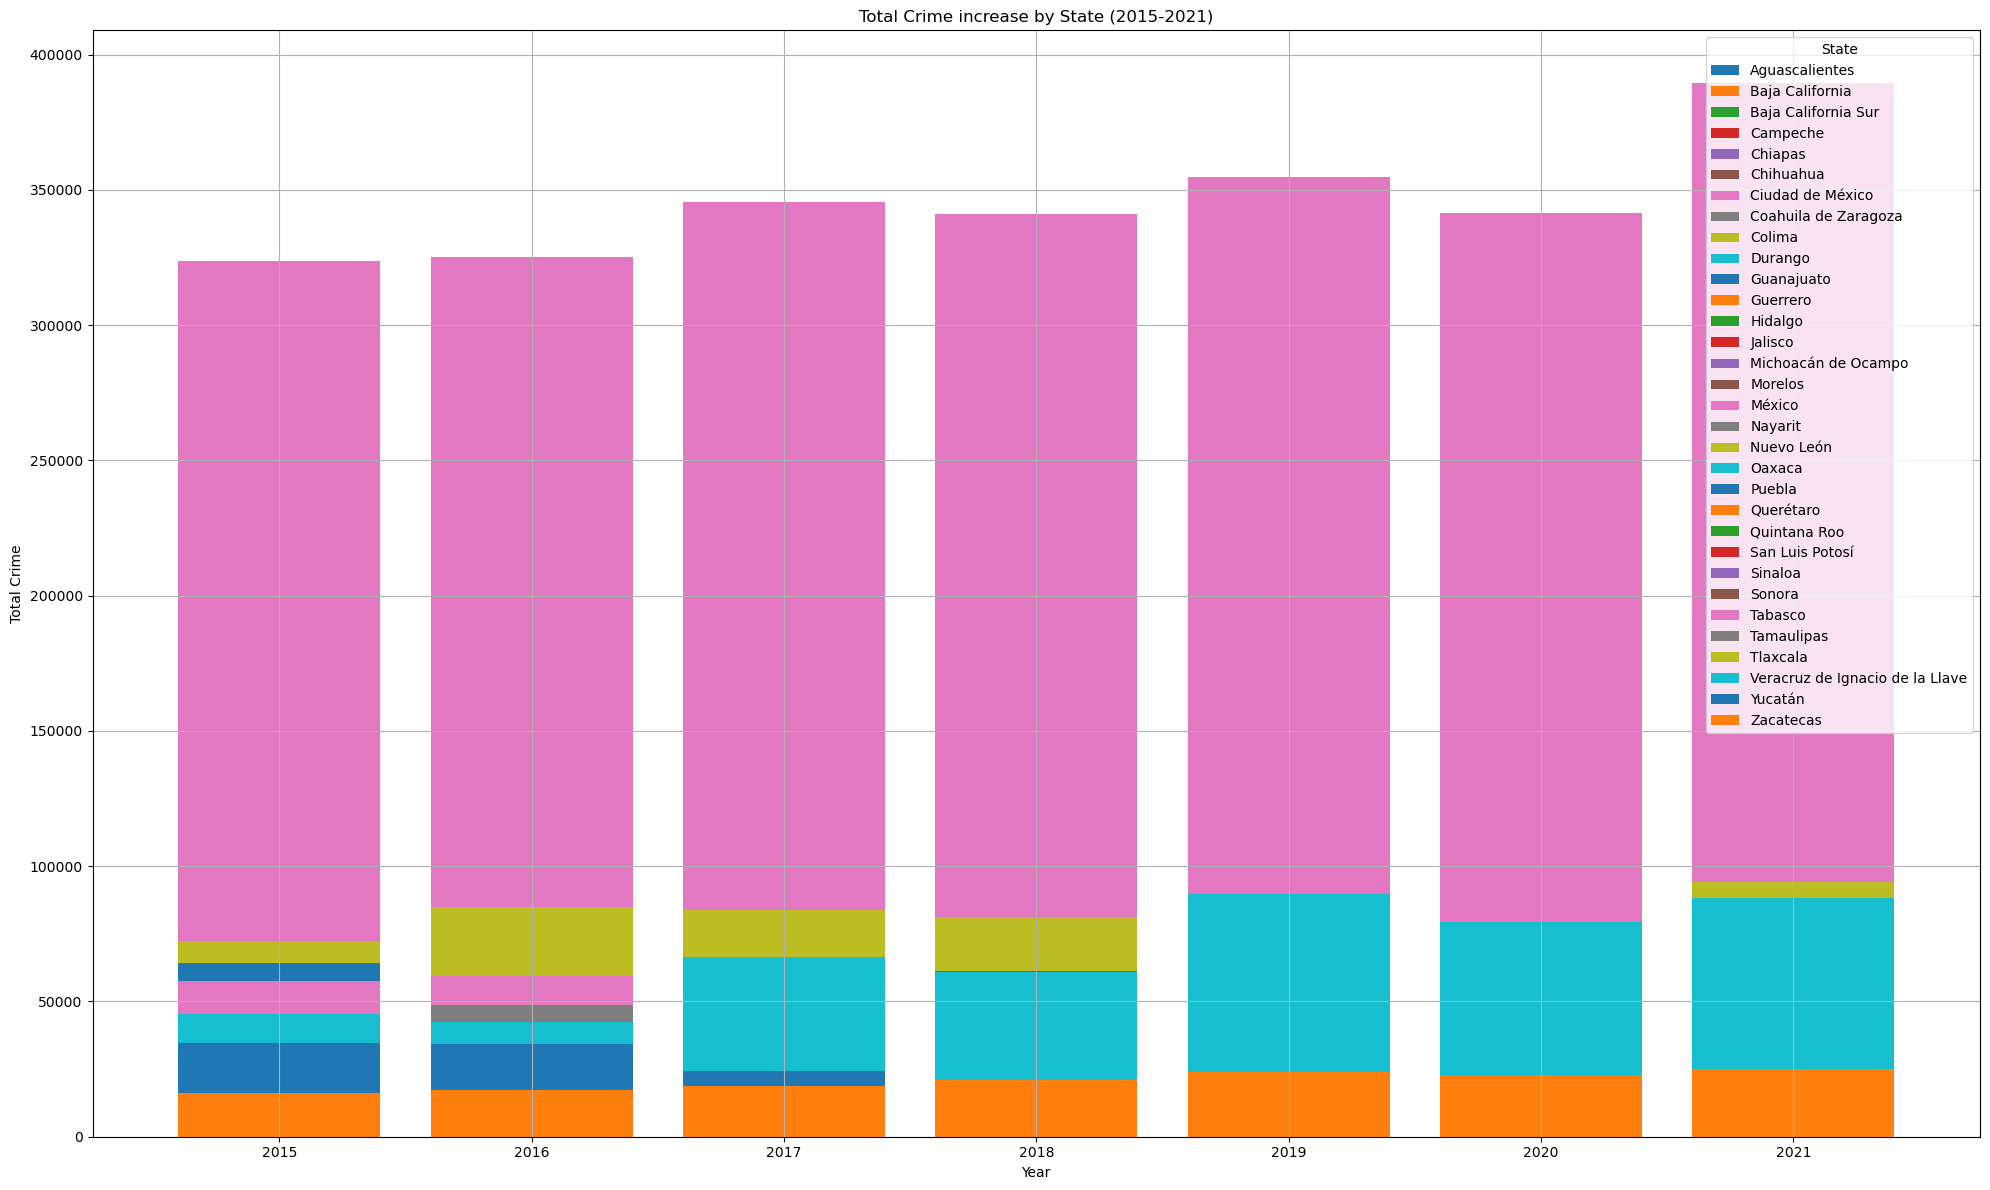

In [30]:

# Bar plot of crime increase overall

plt.figure(figsize=(20, 12))

for state in total_crimes_filter['State'].unique():
    state_data = total_crimes_filter[total_crimes_filter['State'] == state]
    plt.bar(state_data['Year'], state_data['Total Crime'],  label=state)

plt.title('Total Crime increase by State (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022)) 
plt.legend(title='State')
plt.grid()
plt.tight_layout()  
plt.savefig("Resources/Fig8.png")
plt.show()

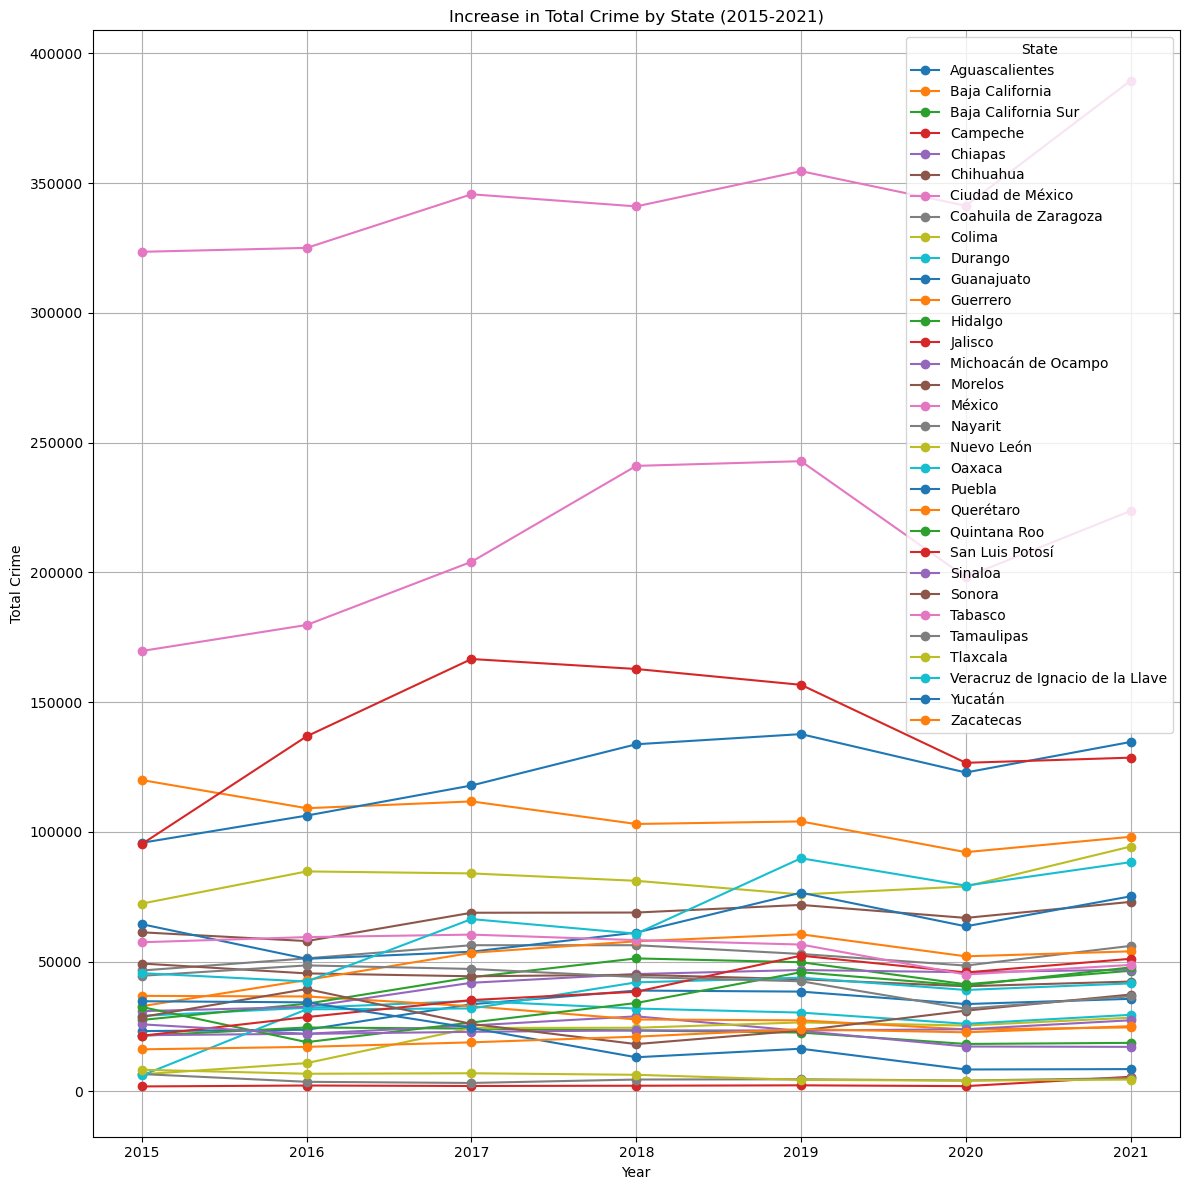

In [31]:
# Line plot of crime increase overall
plt.figure(figsize=(12, 12))

for state in total_crimes_filter['State'].unique():
    state_data = total_crimes_filter[total_crimes_filter['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)


plt.title('Increase in Total Crime by State (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  
plt.legend(title='State')
plt.grid()
plt.tight_layout() 
plt.savefig("Resources/Fig9.png")

plt.show()

In [11]:
#getting the Top 5 States with more crime overall
total_crimes_by_state_2 = total_crimes_filter.groupby('State')['Total Crime'].sum().reset_index()

# Ordenar por Total Delitos de mayor a menor
top_5_states_n = total_crimes_by_state_2.nlargest(5, 'Total Crime')

print("Top 5 states with Most Crimes (2015-2021)")
top_5_states_n

Top 5 states with Most Crimes (2015-2021)


,State,Total Crime
16,México,2420657.0
6,Ciudad de México,1459213.0
13,Jalisco,973345.0
10,Guanajuato,848807.0
1,Baja California,738069.0


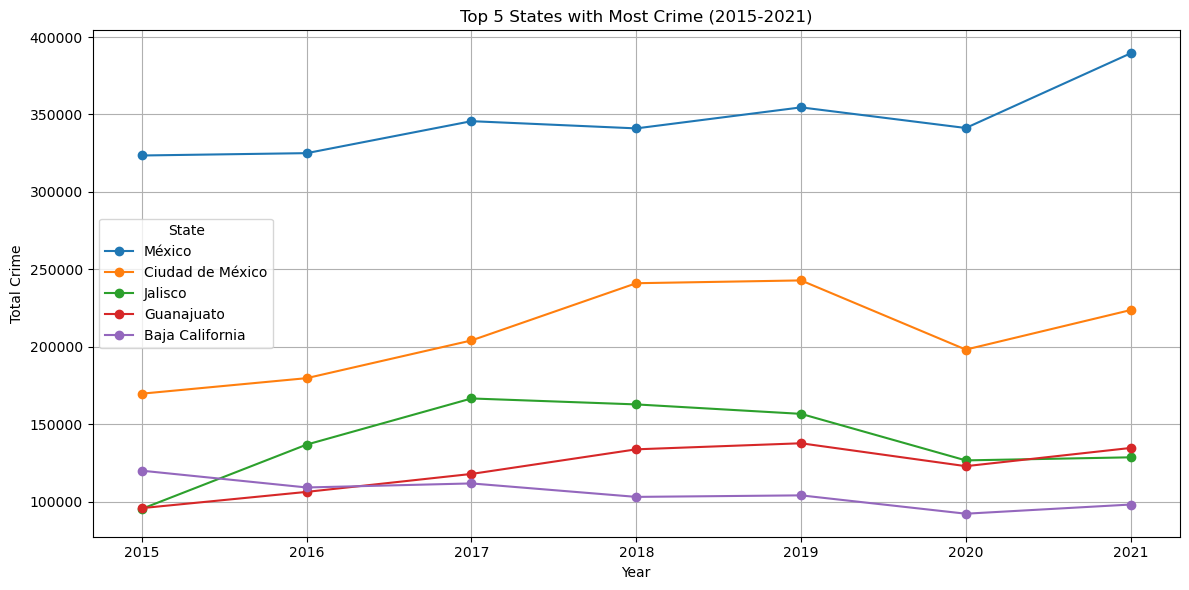

In [32]:
# Line plot for top 5 states with more crime
plt.figure(figsize=(12, 6))

for state in top_5_states_n['State']:
    state_data = total_crimes_filter[total_crimes_filter['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)

plt.title('Top 5 States with Most Crime (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  
plt.legend(title='State')
plt.grid()
plt.tight_layout()  
plt.savefig("Resources/Fig10.png")

plt.show()

In [13]:
#getting the 5 States with least crime overall

least_5_states = total_crimes_by_state_2.nsmallest(5, 'Total Crime')

print("Top 5 States with Least Crimes (2015-2021)")
least_5_states

Top 5 States with Least Crimes (2015-2021)


,State,Total Crime
3,Campeche,18262.0
17,Nayarit,31963.0
28,Tlaxcala,41504.0
30,Yucatán,139924.0
31,Zacatecas,145063.0


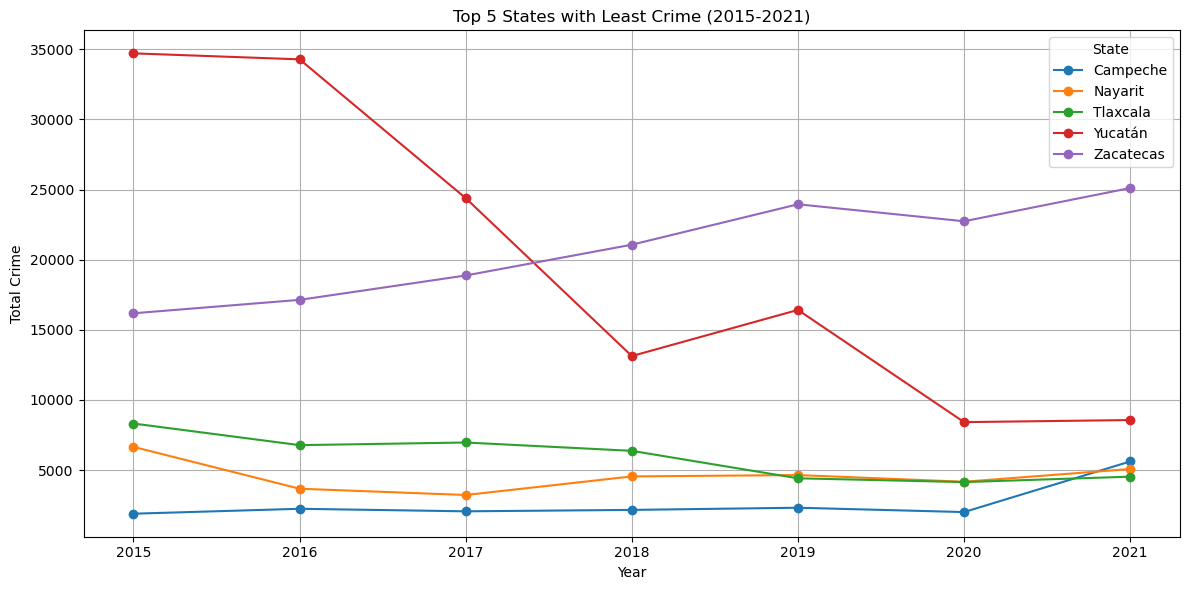

In [33]:
# Plotting the 5 States with least crime overall
plt.figure(figsize=(12, 6))

for state in least_5_states['State']:
    state_data = total_crimes_filter[total_crimes_filter['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)

# Añadir detalles a la gráfica
plt.title('Top 5 States with Least Crime (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  # Mostrar los años en el eje x
plt.legend(title='State')
plt.grid()
plt.tight_layout()  
plt.savefig("Resources/Fig11.png")
plt.show()

<div style="text-align: center;">
    
# THIRD PART
---
</div>

## TORTILLA PRICE INCREASE VS CRIME INCREASE ANALYSIS
### IN THIS PART WE WILL LOAD THE PREVIOUS FILTERED TORTILLA PRICE CSV  TO BE ABLE TO COMPARE THE PRICE INCREASE VS THE CRIME INCREASE AND TRY TO FIND OUT IF THERE IS A CORRELATION BETWEEN THESE 2 PARAMETERS

In [15]:
#reading the previous csv generated on the tortilla.ipynb file
grouped = pd.read_csv("Resources/grouped_tortilla.csv", index_col=0)


In [16]:
grouped

,State,Year,Price per kilogram
0,Aguascalientes,2014,10.998914
1,Aguascalientes,2015,10.825946
2,Aguascalientes,2016,10.933733
3,Aguascalientes,2017,11.003456
4,Aguascalientes,2018,11.406921
...,...,...,...
347,Zacatecas,2020,13.485481
348,Zacatecas,2021,14.593146
349,Zacatecas,2022,15.998767
350,Zacatecas,2023,17.127416


In [17]:
# Getting the years that we want to compare
# since we have data only from 2015 to 2021 in the crime data set obtained we must drop those years on our price file
# in order to do a proper analysis.
grouped_15_21 = grouped[(grouped["Year"]>2014) & (grouped["Year"]<2022)]
grouped_15_21

,State,Year,Price per kilogram
1,Aguascalientes,2015,10.825946
2,Aguascalientes,2016,10.933733
3,Aguascalientes,2017,11.003456
4,Aguascalientes,2018,11.406921
5,Aguascalientes,2019,12.203972
...,...,...,...
344,Zacatecas,2017,11.902483
345,Zacatecas,2018,12.132649
346,Zacatecas,2019,12.542248
347,Zacatecas,2020,13.485481


In [18]:
# Calculate price increase for years 2015 to 2021
price_2015 = grouped_15_21[grouped_15_21['Year'] == 2015].set_index('State')['Price per kilogram']
price_2021 = grouped_15_21[grouped_15_21['Year'] == 2021].set_index('State')['Price per kilogram']

# Calculate price increase into a df
increment = price_2021 - price_2015

# create a df for the increments
increment_df = increment.reset_index()
increment_df.columns = ['State', 'Price Increment']

increment_df.head(10)

,State,Price Increment
0,Aguascalientes,2.458822
1,Baja California,4.268114
2,Baja California Sur,4.569704
3,Campeche,3.259642
4,Chiapas,3.412046
5,Chihuahua,2.734652
6,Coahuila,4.513045
7,Colima,3.430876
8,D.F.,4.143046
9,Durango,3.313575


In [19]:
# Get top 5 greater increment states
top5_increment = increment_df.nlargest(5, 'Price Increment')

# Get top 5 least increment states
bottom5_increment = increment_df.nsmallest(5, 'Price Increment')

print(top5_increment)
print(bottom5_increment)

                  State  Price Increment
11           Guanajuato         5.396285
23      San Luis Potosí         5.105358
13              Hidalgo         4.743786
2   Baja California Sur         4.569704
6              Coahuila         4.513045
             State  Price Increment
28        Tlaxcala         2.320779
29        Veracruz         2.369787
0   Aguascalientes         2.458822
17         Nayarit         2.721520
5        Chihuahua         2.734652


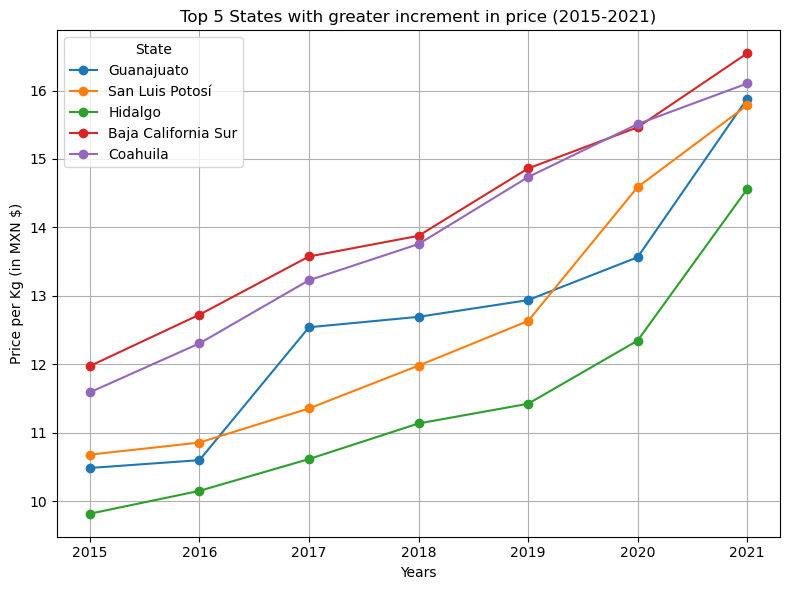

In [34]:
#-------------------------------------------------------------------------------------------------------------------

# Plot graph for top 5 states with greater increment in the desired perior that we are going to compare (2015-2021)
# In this graph we get that the top 5 states with greater increment in price in the perior are:

#Guanajuato
#San Luis Potosí
#Hidalgo
#Baja California Sur
#Coahuila

#This states will be important later because we will use the same states for the correlation with crime graphs

#-------------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8, 6))
for state in top5_increment['State']:
    state_data = grouped_15_21[grouped_15_21['State'] == state]
    plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

plt.title('Top 5 States with greater increment in price (2015-2021)')
plt.xlabel('Years')
plt.ylabel('Price per Kg (in MXN $)')
plt.xticks(range(2015, 2022))
plt.legend(title='State')
plt.grid()
plt.tight_layout()  
plt.savefig("Resources/Fig12.png")
plt.show()

In [21]:
#getting the total number of crimes
num_crime_types = crime_data['Tipo de delito'].nunique()
num_crime_types

40

In [22]:
#getting a sight of the crime types
num_crime_types = crime_data.groupby('Tipo de delito')
count_crime_types = num_crime_types['Tipo de delito',].count()
count_crime_types

,Tipo de delito
Tipo de delito,
Aborto,256
Abuso de confianza,256
Abuso sexual,256
Acoso sexual,256
Allanamiento de morada,256
Amenazas,256
Contra el medio ambiente,256
Corrupción de menores,256
Daño a la propiedad,256


In [23]:
#--------------------------------------------------------------------------------
#In this part we select just this 5 type of crimes which we think are the more appropiate
# to evaluate a direct impact on economics and such in price increase of a good such as tortilla

# Secuestro = Kidnapping
# Robo = Robbery
# Homicidio = Homicide
# Extorsión = Extortion
# Narcomenudeo = Drugdealing

#--------------------------------------------------------------------------------

crime_types = ['Secuestro', 'Robo', 'Homicidio','Extorsión','Narcomenudeo'] 
crime_data_filtered_2 = crime_data[crime_data['Tipo de delito'].isin(crime_types)]
crime_data_filtered_2

,Año,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos por Mes
0,2015,Aguascalientes,Homicidio,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,18.0
1,2015,Aguascalientes,Homicidio,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
2,2015,Aguascalientes,Homicidio,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0,12.0
3,2015,Aguascalientes,Homicidio,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2015,Aguascalientes,Homicidio,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25062,2022,Zacatecas,Robo,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25063,2022,Zacatecas,Robo,94,61,59,73,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351.0
25064,2022,Zacatecas,Robo,192,219,212,205,249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1077.0
25067,2022,Zacatecas,Extorsión,37,58,48,34,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0


In [24]:
#Filtering again with the crimes selected
total_crimes_by_entity = crime_data_filtered_2.groupby(['Entidad', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Calcular el Total de Delitos por Entidad y Año
total_crimes_by_entity['Total Delitos'] = total_crimes_by_entity.iloc[:, 2:].sum(axis=1)
crime_data_compare = total_crimes_by_entity[(total_crimes_by_entity['Año'] >= 2015) & (total_crimes_by_entity['Año'] <= 2021)]
print("\nDataFrame Filtrado (2015 a 2021):")
crime_data_compare.head(15)


DataFrame Filtrado (2015 a 2021):


,Entidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,2015,931,935,1060,944,1030,921.0,959.0,1007.0,972.0,886.0,1011.0,932.0,11588.0
1,Aguascalientes,2016,936,927,1008,1070,1098,846.0,1071.0,1118.0,1003.0,1146.0,1088.0,1123.0,12434.0
2,Aguascalientes,2017,1230,1013,1167,1072,1262,1391.0,1401.0,1539.0,1614.0,1640.0,1604.0,1499.0,16432.0
3,Aguascalientes,2018,1499,1371,1563,1605,1567,1499.0,1675.0,1564.0,1401.0,1460.0,1250.0,1390.0,17844.0
4,Aguascalientes,2019,1441,1250,1340,1362,1416,1265.0,1300.0,1392.0,1296.0,1237.0,1147.0,1145.0,15591.0
5,Aguascalientes,2020,1440,1363,1400,844,963,1084.0,1072.0,943.0,913.0,1009.0,880.0,942.0,12853.0
6,Aguascalientes,2021,1048,1082,1104,890,987,874.0,941.0,936.0,947.0,898.0,953.0,867.0,11527.0
8,Baja California,2015,4305,3731,4118,3930,4064,4220.0,4183.0,4393.0,4253.0,4418.0,4359.0,4315.0,50289.0
9,Baja California,2016,4420,3997,4159,4182,4213,3743.0,3927.0,4405.0,4443.0,4796.0,4580.0,5298.0,52163.0
10,Baja California,2017,5298,4858,5401,5146,5280,4686.0,4971.0,5033.0,4922.0,4771.0,4677.0,4728.0,59771.0


In [25]:
#renaming dataframe for plot handling
total_crimes_by_entityeng_df = crime_data_compare.rename(columns={"Entidad":"State", "Año":"Year","Enero":"January", "Febrero":"February", "Marzo":"March", "Abril":"April","Mayo":"May","Junio":"June", "Julio":"July", "Agosto":"August", "Septiembre":"September", "Octubre":"October", "Noviembre":"November", "Diciembre":"December", "Total Delitos": "Total Crime"})

filtered_crime_data = total_crimes_by_entityeng_df[(total_crimes_by_entityeng_df['Year'] >= 2015) & (total_crimes_by_entityeng_df['Year'] <= 2021)]


print("\nDataFrame Filtered (2015 to 2021):")
filtered_crime_data


DataFrame Filtered (2015 to 2021):


,State,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total Crime
0,Aguascalientes,2015,931,935,1060,944,1030,921.0,959.0,1007.0,972.0,886.0,1011.0,932.0,11588.0
1,Aguascalientes,2016,936,927,1008,1070,1098,846.0,1071.0,1118.0,1003.0,1146.0,1088.0,1123.0,12434.0
2,Aguascalientes,2017,1230,1013,1167,1072,1262,1391.0,1401.0,1539.0,1614.0,1640.0,1604.0,1499.0,16432.0
3,Aguascalientes,2018,1499,1371,1563,1605,1567,1499.0,1675.0,1564.0,1401.0,1460.0,1250.0,1390.0,17844.0
4,Aguascalientes,2019,1441,1250,1340,1362,1416,1265.0,1300.0,1392.0,1296.0,1237.0,1147.0,1145.0,15591.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Zacatecas,2017,650,607,722,680,731,705.0,717.0,836.0,785.0,772.0,687.0,633.0,8525.0
251,Zacatecas,2018,785,820,811,820,763,695.0,767.0,818.0,666.0,753.0,684.0,686.0,9068.0
252,Zacatecas,2019,743,706,695,706,724,691.0,752.0,688.0,759.0,782.0,757.0,757.0,8760.0
253,Zacatecas,2020,821,702,719,483,532,613.0,634.0,620.0,624.0,612.0,581.0,570.0,7511.0


<Figure size 600x600 with 0 Axes>

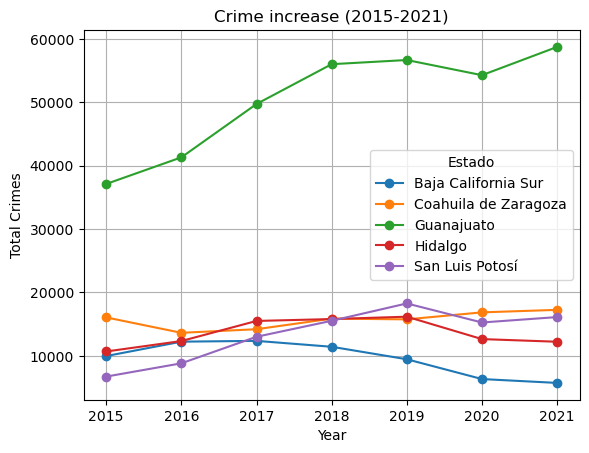

In [35]:
#-------------------------------------------------------------------------------------------------------------------

# Plot graph for 5 states selected before to do a correlation analysis

#Guanajuato
#San Luis Potosí
#Hidalgo
#Baja California Sur
#Coahuila

#-------------------------------------------------------------------------------------------------------------------


estados_interes = ['Guanajuato', 'San Luis Potosí', 'Hidalgo', 'Baja California Sur', 'Coahuila de Zaragoza']
df_filtrado = filtered_crime_data[filtered_crime_data['State'].isin(estados_interes)]
df_pivot = df_filtrado.pivot(index='Year', columns='State', values='Total Crime')

plt.figure(figsize=(6, 6))
df_pivot.plot(kind='line', marker='o')
plt.title('Crime increase (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.legend(title='Estado')
plt.savefig("Resources/Fig13.png")
plt.show()

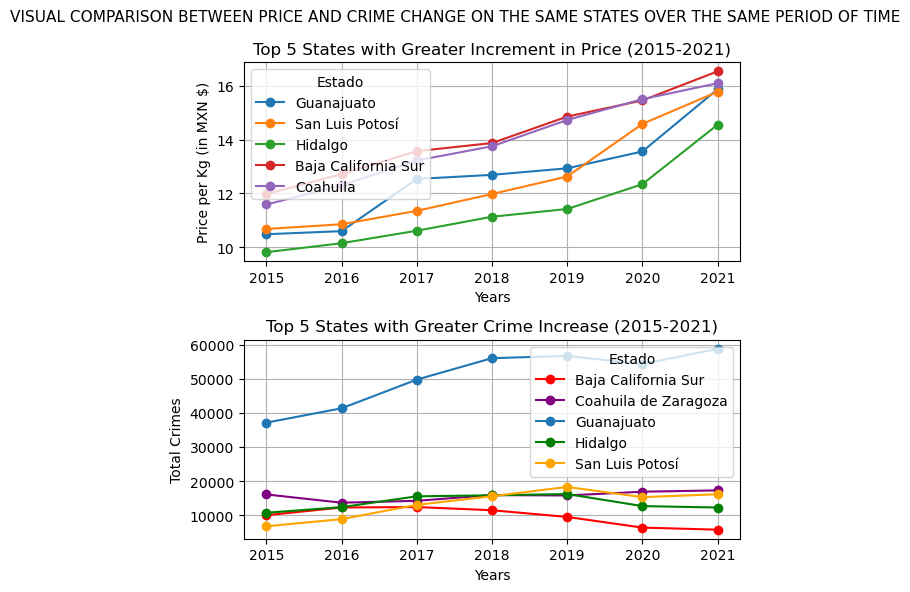

In [36]:
# ----------------------------------------------------------------------------------
# Here we do a subplot of both price and crime increase 
# To see if there's a visual guide to watch a possible correlation
# ----------------------------------------------------------------------------------


estados_interes = ['Guanajuato', 'San Luis Potosí', 'Hidalgo', 'Baja California Sur', 'Coahuila de Zaragoza']
df_filtrado = filtered_crime_data[filtered_crime_data['State'].isin(estados_interes)]

df_pivot = df_filtrado.pivot(index='Year', columns='State', values='Total Crime')

state_colors = {
    'Guanajuato': '#1f77b4',
    'San Luis Potosí': 'orange',
    'Hidalgo': 'green',
    'Baja California Sur': 'red',
    'Coahuila de Zaragoza': 'purple'
}

fig, axs = plt.subplots(2, 1, figsize=(6, 6))  # 2 filas, 1 columna, tamaño de figura ajustado

#Plot : Price Increase
for state in top5_increment['State']:
    state_data = grouped_15_21[grouped_15_21['State'] == state]
    axs[0].plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

axs[0].set_title('Top 5 States with Greater Increment in Price (2015-2021)')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Price per Kg (in MXN $)')
axs[0].set_xticks(range(2015, 2022))
axs[0].grid()
axs[0].legend(title='Estado')

# Plot: Crime Increase
df_pivot.plot(kind='line', marker='o', ax=axs[1], color=[state_colors[state] for state in df_pivot.columns])
axs[1].set_title('Top 5 States with Greater Crime Increase (2015-2021)')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Total Crimes')
axs[1].grid(True)
axs[1].legend(title='Estado')

plt.suptitle('VISUAL COMPARISON BETWEEN PRICE AND CRIME CHANGE ON THE SAME STATES OVER THE SAME PERIOD OF TIME', fontsize=11)
plt.tight_layout()  
plt.savefig("Resources/Fig14.png")
plt.show()

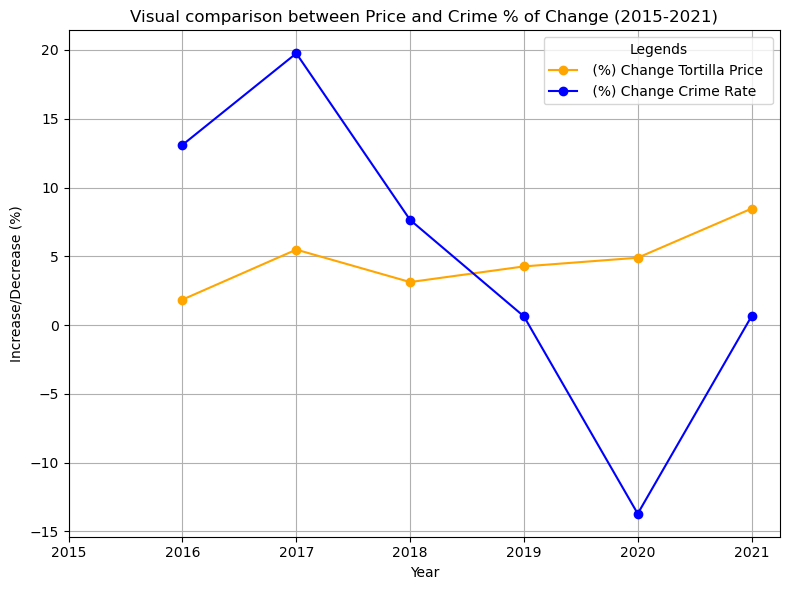

In [37]:
# Correlation graph between price and crime % changue over the same period of time in the same states

# Calculating % change of price
precios = grouped_15_21.groupby('Year')['Price per kilogram'].mean().reset_index()
precios['Incremento'] = precios['Price per kilogram'].pct_change() * 100  #
# Calculating % change of crime
delitos = df_pivot.reset_index()
delitos['Total Crime Incremento'] = delitos[df_pivot.columns].pct_change(axis=0).mean(axis=1) * 100

# Merge both changes into 1 Dataframe
correlacion = pd.merge(precios[['Year', 'Incremento']], delitos[['Year', 'Total Crime Incremento']], on='Year')

# Plotting results
plt.figure(figsize=(8, 6))
plt.plot(correlacion['Year'], correlacion['Incremento'], marker='o', label=' (%) Change Tortilla Price ', color='orange')
plt.plot(correlacion['Year'], correlacion['Total Crime Incremento'], marker='o', label=' (%) Change Crime Rate ', color='blue')

plt.title('Visual comparison between Price and Crime % of Change (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Increase/Decrease (%)')
plt.xticks(range(2015, 2022))
plt.grid()
plt.legend(title='Legends')
plt.tight_layout()
plt.savefig("Resources/Fig15.png")
plt.show()

R squared: 0.0660493194648305


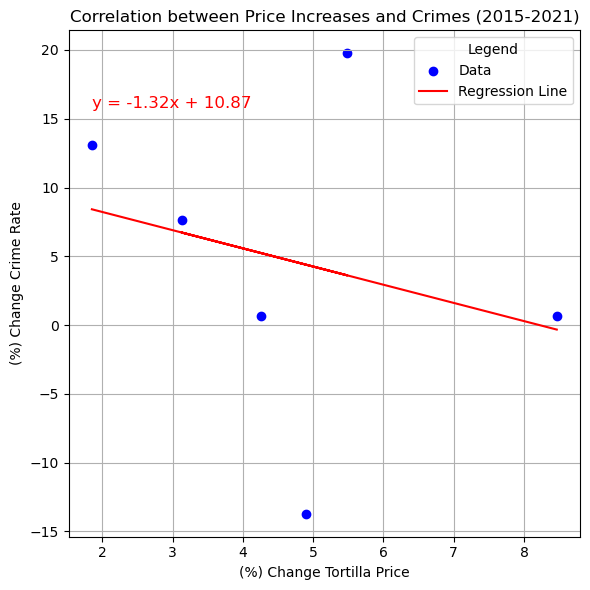

In [38]:
# Graph to analyze and visualize the relationship between the percentage increase in the price
# of tortillas and the percentage increase in the crime rate during the period from 2015 to 2021, 
# using a scatter plot and a linear regression line

x = correlacion['Incremento'].dropna()  
y = correlacion['Total Crime Incremento'].dropna() 

min_length = min(len(x), len(y))
x = x.iloc[:min_length]
y = y.iloc[:min_length]
slope, intercept, r_value, p_value, std_err = linregress(x, y)


plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', label='Data')

plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.title('Correlation between Price Increases and Crimes (2015-2021)')
plt.xlabel('(%) Change Tortilla Price')
plt.ylabel('(%) Change Crime Rate')
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min(), y.max() * 0.8, equation_text, fontsize=12, color='red')

plt.grid()
plt.legend(title='Legend')
plt.tight_layout()

print(f"R squared: {r_value**2}")
plt.savefig("Resources/Fig16.png")
plt.show()